# Import libraries

In [1]:
import numpy as np
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

# 1. Small Bayesian network

# Calculate rotation angles

In [2]:
theta_A = 2 * np.arcsin(np.sqrt(0.2))
theta_B_A = 2 * np.arcsin(np.sqrt(0.9))
theta_B_nA = 2 * np.arcsin(np.sqrt(0.3))

# Define quantum register

In [3]:
qrA = QuantumRegister(1, name='A')
qrB = QuantumRegister(1, name='B')

# Define the circuit

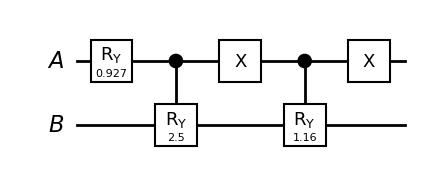

In [4]:
# Define a 2-qubit quantum circuit
qc = QuantumCircuit(qrA, qrB, name="Bayes net small")

#Apply the R_Y_theta rotation gate on the first qubit
qc.ry(theta_A, 0)

# Apply the controlled-R_Y_theta rotation gate
qc.cry(theta_B_A, control_qubit=qrA, target_qubit=qrB)

# Apply the X gate on the first qubit
qc.x(0)

# Apply the controlled-R_Y_theta rotation gate
qc.cry(theta_B_nA, control_qubit=qrA, target_qubit=qrB)

# Apply another X gate on the first qubit
qc.x(0)

qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Measure network

In [5]:
# Measure both qubits
qc.measure_all()

# Simulate network

Result of the Quantum Circuit:
{'00': 5529, '11': 1840, '10': 2421, '01': 210}


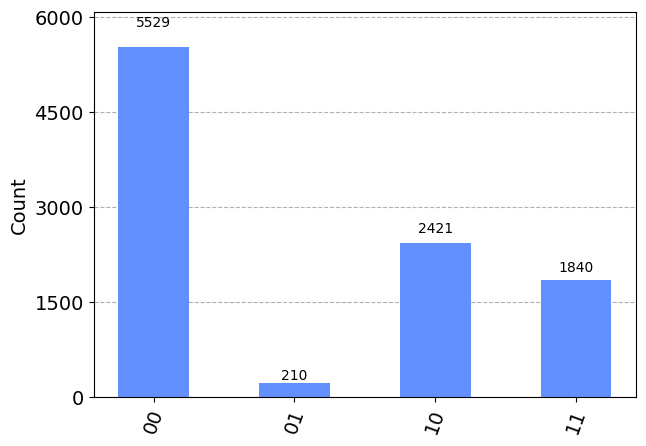

In [6]:
# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts(qc)

# Display the results
print("Result of the Quantum Circuit:")
print(counts)
plot_histogram(counts)

# 2. Medium Bayesian network

# Calculate rotation angles

In [7]:
theta_A = 2 * np.arcsin(np.sqrt(0.2))
theta_B = 2 * np.arcsin(np.sqrt(0.2))
theta_C_nBnA = 2 * np.arcsin(np.sqrt(0.5))
theta_C_nBA = 2 * np.arcsin(np.sqrt(0.25))
theta_C_BnA = 2 * np.arcsin(np.sqrt(0.75))
theta_C_BA = 2 * np.arcsin(np.sqrt(0.5))

# Define quantum register

In [8]:
qrA = QuantumRegister(1, name='A')
qrB = QuantumRegister(1, name='B')
qrC = QuantumRegister(1, name='C')

# Define the circuit

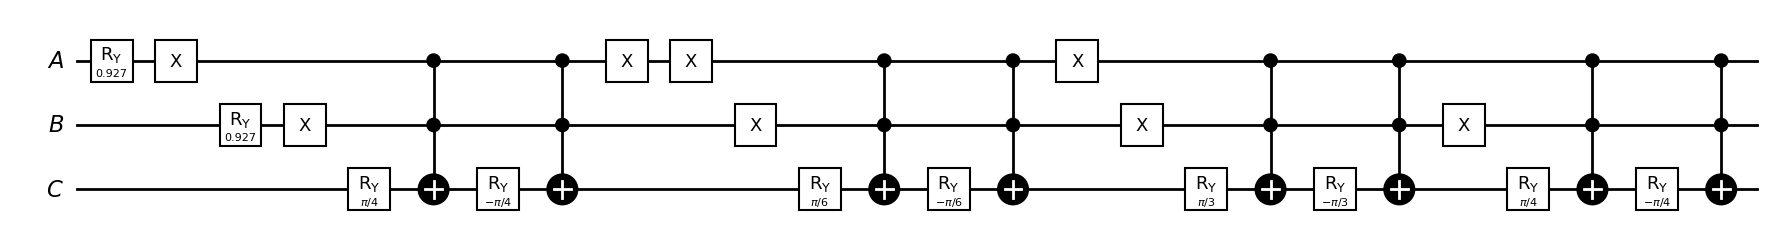

In [9]:
# Define a 3-qubit quantum circuit
qc = QuantumCircuit(qrA, qrB, qrC, name="Bayes net big")

#Apply the R_Y_theta rotation gate on the first two qubits
qc.ry(theta_A, 0)
qc.ry(theta_B, 1)

# Apply the X gate on the first two qubits
qc.x(0)
qc.x(1)

# Apply multiple controlled-R_Y_theta rotation gate
qc.mcry(theta_C_nBnA, [qrA[0], qrB[0]], qrC[0])

# Apply the X gate on the first two qubits
qc.x(0)
qc.x(1)
qc.x(0)

# Apply multiple controlled-R_Y_theta rotation gate
qc.mcry(theta_C_nBA, [qrA[0], qrB[0]], qrC[0])

# Apply another X gate on the first qubit
qc.x(0)
qc.x(1)

# Apply the controlled-R_Y_theta rotation gate
qc.mcry(theta_C_BnA, [qrA[0], qrB[0]], qrC[0])

# Apply another X gate on the second qubit
qc.x(1)

# Apply the controlled-R_Y_theta rotation gate
qc.mcry(theta_C_BA, [qrA[0], qrB[0]], qrC[0])


qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Measure network

In [10]:
# Measure both qubits
qc.measure_all()

# Simulate network

Result of the Quantum Circuit:
{'101': 1164, '000': 3266, '001': 404, '110': 410, '100': 3207, '010': 1152, '011': 199, '111': 198}


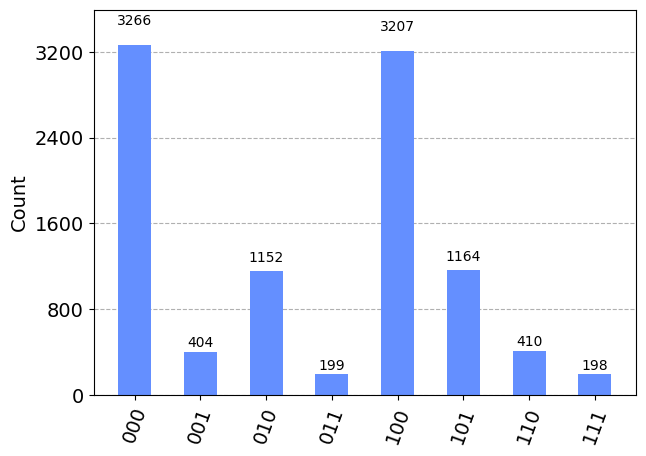

In [11]:
# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts(qc)

# Display the results
print("Result of the Quantum Circuit:")
print(counts)
plot_histogram(counts)

# 3. Big Bayesian network

# Calculate rotation angles

In [12]:
theta_A = 2 * np.arcsin(np.sqrt(0.25))
theta_B_nA = 2 * np.arcsin(np.sqrt(0.6))
theta_B_A = 2 * np.arcsin(np.sqrt(0.7))
theta_C_nBnA = 2 * np.arcsin(np.sqrt(0.1))
theta_C_nBA = 2 * np.arcsin(np.sqrt(0.55))
theta_C_BnA = 2 * np.arcsin(np.sqrt(0.7))
theta_C_BA = 2 * np.arcsin(np.sqrt(0.9))

# Define quantum register

In [13]:
qrA = QuantumRegister(1, name='A')
qrB = QuantumRegister(1, name='B')
qrC = QuantumRegister(1, name='C')

# Define the circuit

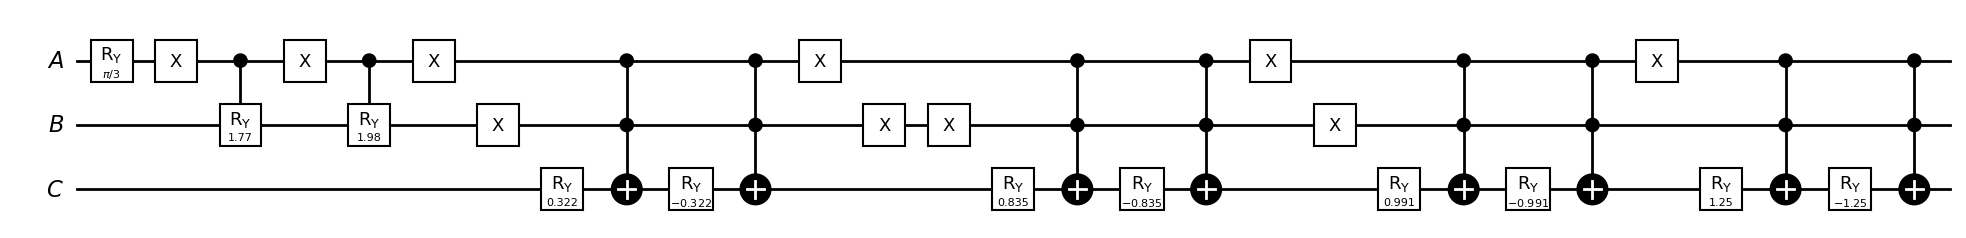

In [14]:
# Define a 3-qubit quantum circuit
qc = QuantumCircuit(qrA, qrB, qrC, name="Bayes net big")

# P(A)
qc.ry(theta_A, 0)

# P(B|-A)
qc.x(0)
qc.cry(theta_B_nA, qrA, qrB)
qc.x(0)

# P(B|A)
qc.cry(theta_B_A, qrA, qrB)

# P(C|-B,-A)
qc.x(0)
qc.x(1)
qc.mcry(theta_C_nBnA, [qrA[0], qrB[0]], qrC[0])
qc.x(0)
qc.x(1)

# P(C|-B,A)
qc.x(1)
qc.mcry(theta_C_nBA, [qrA[0], qrB[0]], qrC[0])
qc.x(1)

# P(C|B,-A)
qc.x(0)
qc.mcry(theta_C_BnA, [qrA[0], qrB[0]], qrC[0])
qc.x(0)

# P(C|B,A)
qc.mcry(theta_C_BA, [qrA[0], qrB[0]], qrC[0])


qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Measure network

In [15]:
# Measure both qubits
qc.measure_all()

# Simulate network

Result of the Quantum Circuit:
{'000': 2736, '110': 3076, '111': 1613, '010': 1362, '011': 183, '100': 287, '101': 414, '001': 329}


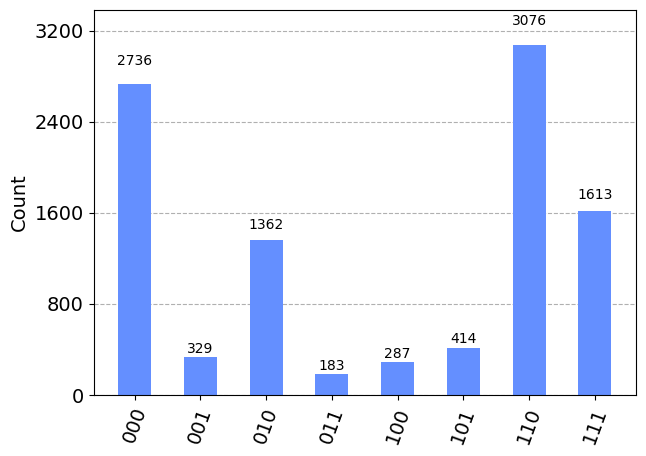

In [16]:
# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts(qc)

# Display the results
print("Result of the Quantum Circuit:")
print(counts)
plot_histogram(counts)